# Class 15 – Logistic Regression

## Duration: 2 Hours

### Objective:
By the end of this lesson, you will understand:
- What Logistic Regression is
- How it's used in binary classification tasks
- How to evaluate a logistic regression model using classification metrics


## 1. Introduction to Logistic Regression

Logistic Regression is a **statistical method** used for binary classification tasks. That means it helps us **predict an outcome that has only two values** — like Yes/No, True/False, or 1/0.

### Real Life Example:
Imagine you're working for a telecom company and you want to **predict whether a customer will leave the company (churn)** or not. The outcome is binary: either **churn = yes (1)** or **churn = no (0)**.

### Key Concept: Sigmoid Function

Logistic regression uses the **sigmoid function** to convert any real number into a value between 0 and 1 — which we then interpret as a probability.

Logistic regression uses the Sigmoid function to predict the probability of a sample belonging to a certain class. The output is a value between 0 and 1, which is then mapped to the nearest class label (0 or 1).


The formula of the sigmoid function is:

\[
S(z) = \frac{1}{1 + e^{-z}}
\]

Where **z** is the weighted sum of inputs.

The prediction formula becomes:

\[
P(y=1|X) = \frac{1}{1 + e^{-(w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n)}}
\]

- \(x_1, x_2,...,x_n\): input features
- \(w_1, w_2,...,w_n\): weights learned by the model


## 2. Implementing Logistic Regression

Let's implement Logistic Regression using Python and Scikit-learn.
We'll go step-by-step, explaining each part.

Objective: Implement a logistic regression model using scikit-learn to solve a binary classification problem.
Steps for Logistic Regression:
Load the Dataset: Load and explore a dataset (e.g., customer churn dataset).


Preprocess the Data: Handle missing values, encode categorical variables, split the dataset into training and testing sets.


Train the Model: Use LogisticRegression from scikit-learn to train the model.


Predict and Evaluate: Use evaluation metrics like Confusion Matrix, Accuracy, Precision, Recall, and F1-Score.



### Step 1: Import Required Libraries
These libraries help us load data, preprocess it, and build our model.


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load Dataset

We’ll use a sample **customer churn dataset**. You can use your own or find one online.


In [14]:
# Load dataset (replace this with your own path or dataset if needed)
data = pd.read_csv('Customer.csv')
data.head()

,CustomerID,Tenure,MonthlyCharge,TotalCharges,Contract,PaymentMethod,PaperlessBilling,AverageUsage,TotalUsage,Churn
0,CUST_1,38,128.570307,4885.671652,Month-to-month,Credit card,0,34.577658,1313.950991,0
1,CUST_2,44,122.904332,5407.790597,One year,Bank transfer,0,43.387375,1909.044500,0
2,CUST_3,13,79.127233,1028.654035,Month-to-month,Credit card,0,14.974818,194.672633,0
3,CUST_4,9,88.537223,796.835005,Month-to-month,Electronic check,0,14.611459,131.503133,1
4,CUST_5,10,148.100000,1481.000003,One year,Electronic check,1,15.346697,153.466972,0


### Step 3: Preprocess Data

- Drop any missing values
- Encode categorical values (like 'Yes'/'No') into numbers


In [15]:
data.isnull().sum()

CustomerID          0
Tenure              0
MonthlyCharge       0
TotalCharges        0
Contract            0
PaymentMethod       0
PaperlessBilling    0
AverageUsage        0
TotalUsage          0
Churn               0
dtype: int64

In [16]:
# Step 2: Drop irrelevant column
data = data.drop(columns=['CustomerID'])

In [17]:
# Step 3: Handle missing values
data = data.dropna()

In [18]:
# Step 4: Encode categorical variables
data['Churn'] = data['Churn'].astype(int)  # Ensure target is integer
data = pd.get_dummies(data, columns=['Contract', 'PaymentMethod'], drop_first=True)

### Step 4: Select Features and Labels

Here we separate our **independent variables (X)** from our **dependent variable (y)**.

In [19]:
data.columns

Index(['Tenure', 'MonthlyCharge', 'TotalCharges', 'PaperlessBilling',
       'AverageUsage', 'TotalUsage', 'Churn', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [20]:
# Step 5: Define features (X) and target (y)
X = data.drop('Churn', axis=1)


In [ ]:
data.shape

In [22]:
y = data['Churn']

### Step 5: Split Data into Training and Testing Sets

We’ll train our model on one part and test it on the other to check performance

In [23]:
# Step 6: Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 6: Train the Logistic Regression Model

In [24]:
# Step 7: Train Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


c:\Users\presh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### Step 7: Make Predictions

In [25]:
# Step 8: Predict
y_pred = model.predict(X_test)

### Step 8: Evaluate the Model

Let’s calculate:
- Confusion Matrix
- Accuracy
- Precision
- Recall
- F1-Score

In [26]:
# Step 9: Evaluate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

Confusion Matrix:
[[1498    0]
 [ 502    0]]
Accuracy: 74.90%
Precision: 37.45%
Recall: 50.00%
F1-Score: 42.82%


c:\Users\presh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Step 9: Plot Confusion Matrix

A visual form of confusion matrix helps better understanding.

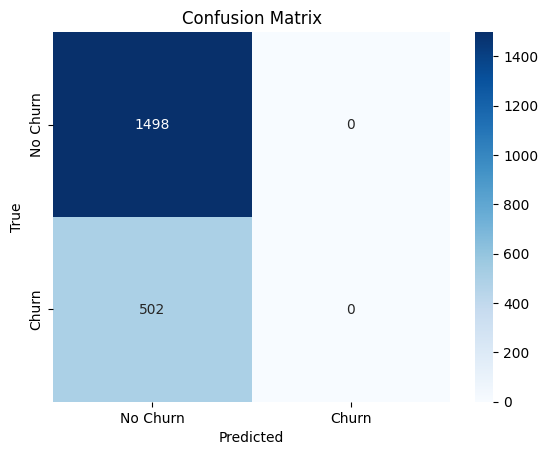

In [27]:
# Step 10: Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## 3. Understanding Evaluation Metrics

### Confusion Matrix


True Positives (TP): Correctly predicted churned customers.


True Negatives (TN): Correctly predicted non-churned customers.


False Positives (FP): Incorrectly predicted churned customers.


False Negatives (FN): Incorrectly predicted non-churned customers.


|                    | Actual: Yes   | Actual: No            |
|--------------------|---------------|-----------------------|
| **Predicted: Yes** | True Positive (TP) | False Positive(FP) |
| **Predicted: No**| False Negative (FN) | True Negative(TN) |

### Classification Metrics:

- **Accuracy** = (TP + TN) / (TP + TN + FP + FN)
- **Precision** = TP / (TP + FP)
- **Recall** = TP / (TP + FN)
- **F1 Score** = 2 * (Precision * Recall) / (Precision + Recall)

Each metric gives different insights — we use all of them to understand performance.


## 4. Wrap-Up and Hands-On Practice

### Recap:
- Logistic Regression is great for binary classification problems.
- We implemented it using scikit-learn.
- We evaluated it using Accuracy, Precision, Recall, and F1-Score.

### Hands-On Activity:
Use a different dataset (like spam detection or bank marketing) and try:
- Changing the features
- Comparing performance
- Interpreting results using the same metrics

Good Luck!
